In [18]:
pip install pandas numpy matplotlib statsmodels

Note: you may need to restart the kernel to use updated packages.


In [20]:
import statsmodels
print(statsmodels.__version__)

0.14.2


In [21]:
import numpy as np
import pandas as pd
import pickle 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [22]:
with open('../data/raw_data.pickle', 'rb') as f:
    data = pickle.load(f)

In [23]:
data

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [24]:
mapping = {
    'NE': 1,
    'SE': 2,
    'NW': 3,
    'cv': 4
}

data.wnd_dir = data.wnd_dir.map(mapping)
data.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,2,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,2,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,2,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,2,6.25,2,0


In [25]:
from statsmodels.tsa.stattools import adfuller

In [28]:
result = adfuller(df['pollution'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -21.004108528409148
p-value: 0.0


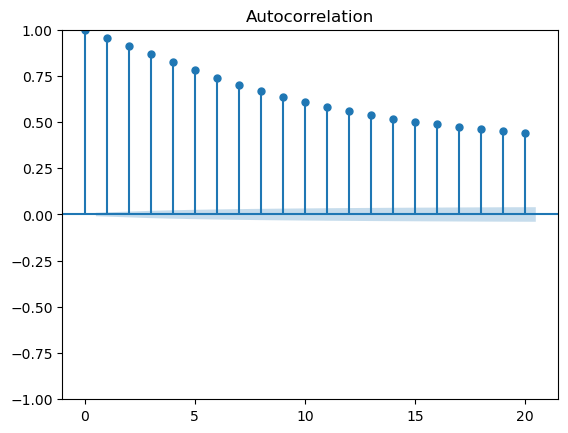

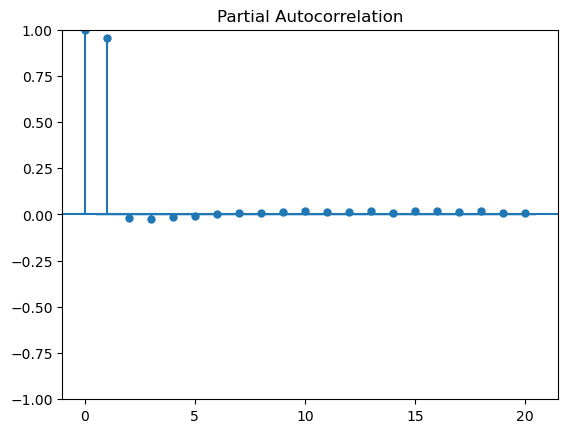

In [30]:
plot_acf(data['pollution'].dropna(), lags=20)
plt.show()

plot_pacf(data['pollution'].dropna(), lags=20)
plt.show()

In [31]:
model = ARIMA(data['pollution'], order=(2, 2, 2))
model_fit = model.fit()

c:\Users\djjjo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\djjjo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\djjjo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


In [32]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              pollution   No. Observations:                43800
Model:                 ARIMA(2, 2, 2)   Log Likelihood             -207414.222
Date:                Tue, 19 Nov 2024   AIC                         414838.445
Time:                        01:32:07   BIC                         414881.882
Sample:                    01-02-2010   HQIC                        414852.136
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9930      0.010   -100.120      0.000      -1.012      -0.974
ar.L2         -0.0033      0.001     -3.004      0.003      -0.005      -0.001
ma.L1         -0.0093      0.010     -0.924      0.3

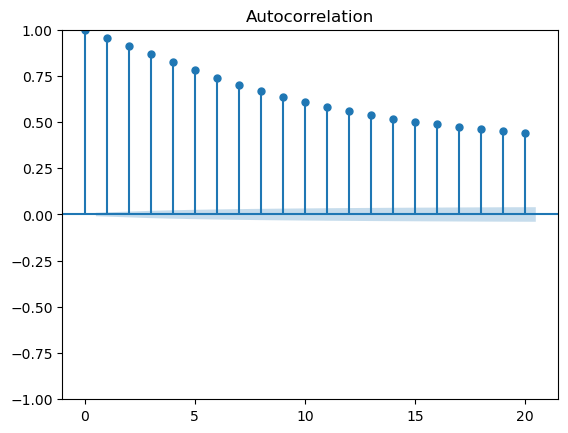

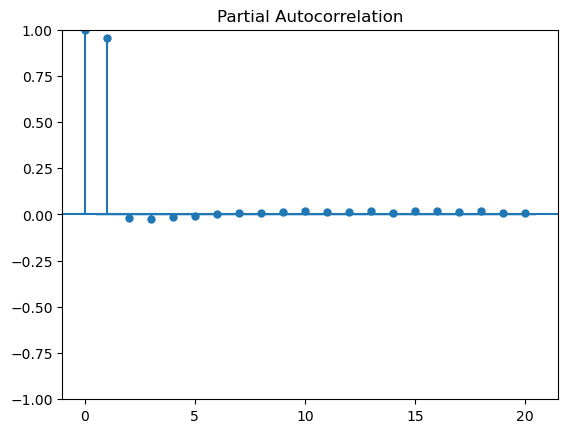